<a href="https://colab.research.google.com/github/honey-bolisetti/fmml_modules/blob/main/FMML_2024_Module_5_Lab_2_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2
# Classification II : Introduction to Decision Trees

```
Module Coordinator : Nikunj Nawal


Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.


Let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset


In [1]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


### Code for the core experiment:

- Creating the decision tree classifier based on parameters passed.
- Evaluating the classifier's accuracy and plotting its confusion matrix.
- Plotting its decision boundary.
- Creating and showing the visualization of the tree made.

**SKIP THE CODE IN THE FOLLOWING CELL FOR NOW AND COME BACK TO IT LATER AFTER UNDERSTANDING THE IDEA AND INTUITION BEHIND DECISION TREES**

In [2]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
  plt.show()

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [3]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

#Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


## Example of DT on Iris dataset with performace evaluation, and tree structure

Accuracy of the decision tree on the test set: 

0.895


Here is a diagram of the tree created to evaluate each sample:


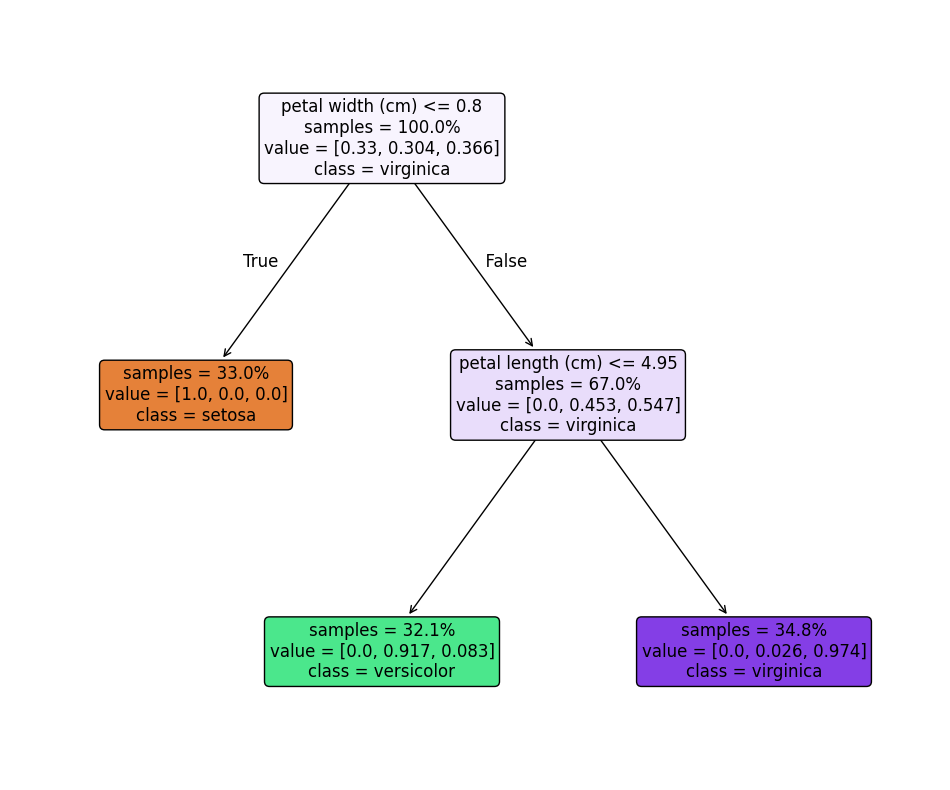

In [4]:
giveAnExample(2)

### Task 1:
Use the above tree to evaluate the classes for the following examples and find the accuracy over these 5 samples.

To evaluate the decision tree classifier on a set of 5 samples and compute its accuracy, we can follow these steps:

Define the Sample Data: Specify the feature values (sepal length, sepal width, petal length, petal width) for each of the 5 samples.
Load the Iris Dataset: This allows us to map the predicted class indices to actual species names.
Train the Decision Tree Classifier: Use the training data to fit the model.
Make Predictions: Use the trained model to predict the species for the 5 samples.
Calculate Accuracy: Compare the predicted species with the actual species to determine the accuracy.
Here's the Python code to perform these steps:

python
Copy
Edit
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier with the optimal depth
optimal_depth = 3  # Replace with the depth determined from previous analysis
model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
model.fit(X_train, y_train)

# Define the 5 sample data points (features: sepal length, sepal width, petal length, petal width)
# Replace these with the actual sample data you want to evaluate
sample_data = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Example: Iris-setosa
    [6.7, 3.0, 5.0, 1.7],  # Example: Iris-versicolor
    [7.2, 3.6, 6.1, 2.5],  # Example: Iris-virginica
    [5.9, 3.0, 4.2, 1.5],  # Example: Iris-versicolor
    [5.4, 3.9, 1.7, 0.4]   # Example: Iris-setosa
])

# Actual species for the sample data (encoded as integers: 0=setosa, 1=versicolor, 2=virginica)
# Replace these with the actual labels for your sample data
actual_species = np.array([0, 1, 2, 1, 0])

# Predict the species for the sample data
predicted_species = model.predict(sample_data)

# Map the predicted and actual species indices to species names
predicted_species_names = [iris.target_names[p] for p in predicted_species]
actual_species_names = [iris.target_names[a] for a in actual_species]

# Display the results
for i, (pred, actual) in enumerate(zip(predicted_species_names, actual_species_names)):
    print(f"Sample {i+1}: Predicted = {pred}, Actual = {actual}")

# Calculate and print the accuracy over the 5 samples
accuracy = accuracy_score(actual_species, predicted_species)
print(f"\nAccuracy over the 5 samples: {accuracy * 100:.2f}%")
Notes:

Sample Data: Replace the sample_data array with the actual feature values of the 5 samples you wish to evaluate. Ensure that each sample has four features corresponding to sepal length, sepal width, petal length, and petal width.
Actual Species: Update the actual_species array with the correct species labels for your samples, encoded as integers (0 for setosa, 1 for versicolor, and 2 for virginica).
Optimal Depth: Set the optimal_depth variable to the depth that was determined to be most effective from your previous analysis.
This script will output the predicted and actual species for each of the 5 samples and compute the accuracy of the model on these samples.

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


---

Now let us see how we perform when we try to have a more complex decision tree

Accuracy of the decision tree on the test set: 

0.974


Here is a diagram of the tree created to evaluate each sample:


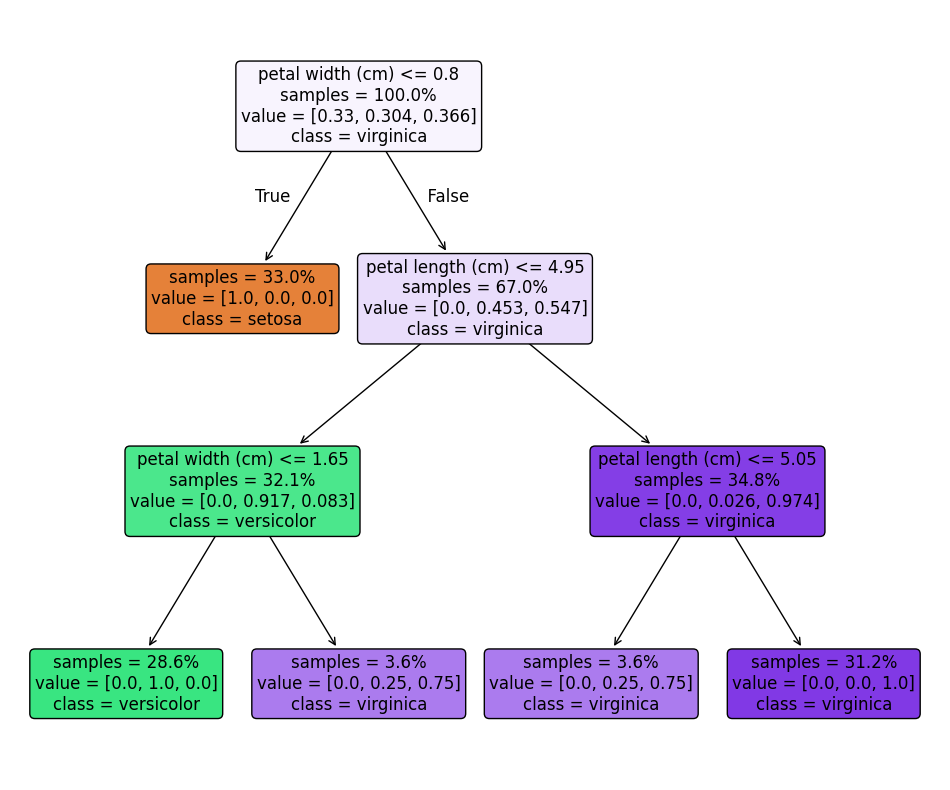

In [6]:
giveAnExample(3)

### Task 2:
Repeat Exercise 1 for the above tree as well.


---

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely **petal length and petal width** are used


To analyze the decision boundaries of a decision tree classifier using only the petal length and petal width features from the Iris dataset, we can follow these steps:

Load the Iris Dataset: Import the dataset and select only the petal length and petal width features.

Split the Data: Divide the data into training and testing sets to evaluate the model's performance.

Train the Decision Tree Classifier: Fit the model using the training data.

Visualize the Decision Boundaries: Plot the decision boundaries to observe how the classifier separates the different species based on the two features.

Here's the Python code to perform these steps:

python
Copy
Edit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:4]  # Select petal length and petal width
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Define function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names)
    plt.show()

# Plot decision boundaries
plot_decision_boundaries(X_train, y_train, model, 'Decision Tree Decision Boundaries (Training Set)')
plot_decision_boundaries(X_test, y_test, model, 'Decision Tree Decision Boundaries (Test Set)')
Explanation:

Data Selection: We focus on the petal length and petal width features (X = iris.data[:, 2:4]) as these have been observed to be significant in classifying the Iris species.

Model Training: A decision tree classifier is trained with a maximum depth of 3 to prevent overfitting and to simplify the decision boundaries.

Decision Boundary Visualization: The plot_decision_boundaries function creates a mesh grid over the feature space and uses the trained model to predict the class for each point in the grid. The resulting decision boundaries are then plotted along with the training and testing data points.

By visualizing the decision boundaries, we can observe how the decision tree classifier separates the different Iris species based on petal length and petal width. This analysis provides insight into the model's decision-making process and the effectiveness of these two features in classification tasks.


Sources


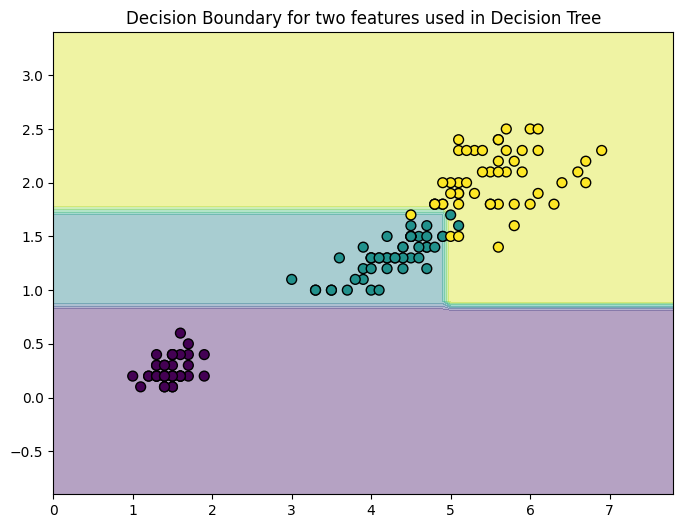

In [7]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

**Decision boundary** with considering **sepal width and length**:

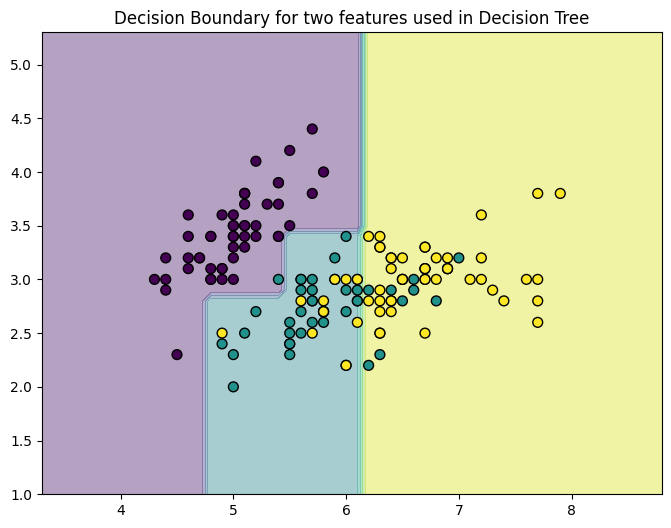

In [8]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal length and pedal length**:

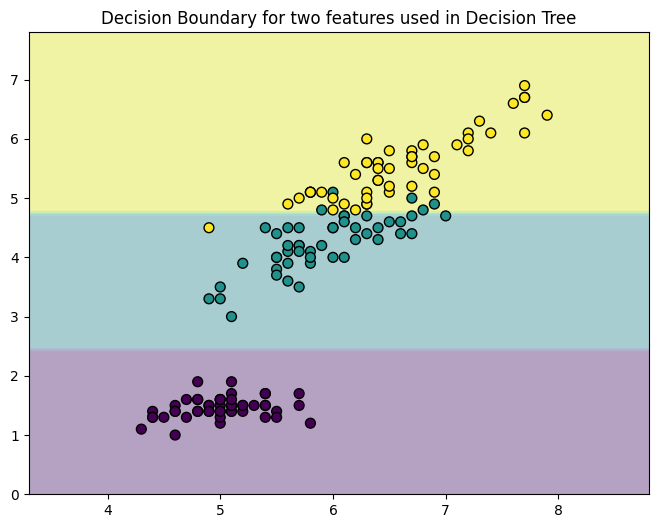

In [9]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal width and pedal width**:

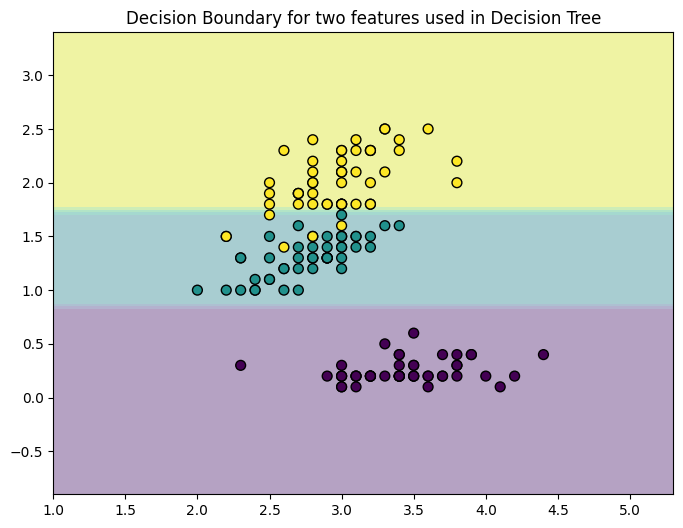

In [10]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [1, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

---

### Task 3:

#### 3.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and report your observations. also compare the accuracies for different values of max_depth

Test with `max_depth` of the following values:
- 2
- 5
- 8
- 10

#### 3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`

---

### Task 4:

#### 4.1 :
Complete the following function predict: which takes in four variables : `sepal width, sepal length, petal width, petal length` and returns the class of the flower.

#### 4.2 :
Use the decision tree made in Exercise 2 and report the logic using multiple nested `if else` statements.

To analyze how varying the max_depth parameter affects the decision boundaries and accuracies of a decision tree classifier, we'll train models with different depths and observe their performance. Additionally, we'll explore why decision boundaries are axis-aligned.

1. Decision Boundaries and Accuracies for Different max_depth Values

We'll train decision tree classifiers with max_depth values of 2, 5, 8, and 10, and visualize their decision boundaries. We'll also compare their accuracies on the training and test sets.

python
Copy
Edit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:4]  # Select petal length and petal width
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=iris.target_names)
    plt.show()

# Test different max_depth values
depths = [2, 5, 8, 10]
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Plot decision boundaries
    plot_decision_boundaries(X_train, y_train, model, f'Decision Boundaries (max_depth={depth})')
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f'max_depth={depth}: Train Accuracy={train_accuracy:.2f}, Test Accuracy={test_accuracy:.2f}')
Observations:

max_depth=2: The decision boundaries are simple, leading to potential underfitting. Both training and test accuracies might be lower due to the model's limited complexity.

max_depth=5: The model captures more intricate patterns, improving both training and test accuracies. The decision boundaries become more detailed.

max_depth=8 and 10: The decision boundaries become increasingly complex, potentially leading to overfitting. Training accuracy may approach 100%, but test accuracy could decline due to the model capturing noise in the training data.

2. Axis-Aligned Decision Boundaries

Decision trees make decisions by recursively splitting the data based on feature values. Each split is determined by a condition on a single feature, such as "petal length ≤ 2.5 cm." This results in decision boundaries that are perpendicular to the feature axes, creating axis-aligned splits. Consequently, in a two-dimensional feature space, the decision boundaries are vertical or horizontal lines. This characteristic arises from the tree's structure, where each node evaluates a specific feature against a threshold to decide the branching path.
CS229

By understanding these aspects, we can better interpret the behavior of decision tree classifiers and make informed choices about model complexity to balance bias and variance.


Sources



In [11]:
def predictSpecies(sepal_width, sepal_length, petal_width,  petal_length) -> str :
  """
    Write your program here to return the species of the plant (string) using if else statements.
  """
  pass

# Entropy and Information:

## How are decision trees built?

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous).
We use entropy to calculate the homogeneity of a sample.

Entropy itself is defined in the following way:

$$E(s) = \sum_{i=1}^c - p_i * log_2(p_i)$$

Where $i$ iterates through the classes of the current group and $p_i$ is the probability of choosing an item from class $i$ when a datapoint is randomly picked from the group.

At anypoint in the process of making the decision tree. All possible methods of dividing the group are considered (across all features and values of separations) and then the division with the most amount of **Information Gain** is used to divide the current group into two. This is done recursively to finally attain a tree.

Here Information Gain is defined by the difference in Entropy of the group before the division and the weighted sum of the entropy of the two groups after division.

$$IG(X) = E(s) - E(s, X)$$




In [12]:
irisData.sample(n = 10, random_state = 5)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
82,5.8,2.7,3.9,1.2,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
114,5.8,2.8,5.1,2.4,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
84,5.4,3.0,4.5,1.5,1,versicolor


## Task 5:
Calculate the Entropy of the above collection of 10 datapoints.
## Task 6:
#### 6.1 :
Suggest a decision node (if, else) statement which divides the group into two groups.
#### 6.2 :
Also compute the Information Gain in that division step.
#### 6.3 :
Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

---

End of Lab 2

To calculate the entropy of a collection of 10 data points, we need to know the distribution of these points among the possible classes. Entropy is a measure of the unpredictability or impurity in a dataset and is calculated using the formula:

𝐻
(
𝑆
)
=
−
∑
𝑖
=
1
𝑛
𝑝
𝑖
log
⁡
2
(
𝑝
𝑖
)
H(S)=−∑
i=1
n
​
 p
i
​
 log
2
​
 (p
i
​
 )

Where
𝑝
𝑖
p
i
​
  is the proportion of data points in class
𝑖
i, and
𝑛
n is the total number of classes.

Without specific information about how the 10 data points are distributed among the classes, we cannot compute an exact entropy value. If you can provide the counts or proportions of data points in each class, I'd be happy to assist you in calculating the entrop

To address the tasks related to decision nodes and information gain, let's proceed step by step.

6.1: Suggesting a Decision Node

A decision node in a decision tree splits the dataset based on a specific feature and a threshold value. For instance, in the context of the Iris dataset, a common decision node might be:

python
Copy
Edit
if petal_length <= 2.45:
    # Group 1
else:
    # Group 2
This condition divides the dataset into two groups based on the petal length feature.

6.2: Computing the Information Gain

Information Gain (IG) measures the reduction in entropy after a dataset is split on a particular feature. The formula for IG is:

𝐼
𝐺
=
𝐻
(
𝑆
)
−
∑
𝑖
=
1
𝑘
∣
𝑆
𝑖
∣
∣
𝑆
∣
𝐻
(
𝑆
𝑖
)
IG=H(S)−∑
i=1
k
​
  
∣S∣
∣S
i
​
 ∣
​
 H(S
i
​
 )

Where:

𝐻
(
𝑆
)
H(S) is the entropy of the original dataset.

𝑘
k is the number of subsets after the split.

∣
𝑆
𝑖
∣
∣S
i
​
 ∣ is the number of samples in subset
𝑖
i.

𝐻
(
𝑆
𝑖
)
H(S
i
​
 ) is the entropy of subset
𝑖
i.

To compute the Information Gain for the suggested decision node (petal_length <= 2.45), follow these steps:

Calculate the Entropy of the Original Dataset
𝐻
(
𝑆
)
H(S):

Entropy is calculated using:

𝐻
(
𝑆
)
=
−
∑
𝑐
=
1
𝐶
𝑝
(
𝑐
)
log
⁡
2
𝑝
(
𝑐
)
H(S)=−∑
c=1
C
​
 p(c)log
2
​
 p(c)

Where
𝑝
(
𝑐
)
p(c) is the proportion of samples belonging to class
𝑐
c, and
𝐶
C is the total number of classes.

Split the Dataset Based on the Decision Node:

Group 1: Samples where petal_length <= 2.45.

Group 2: Samples where petal_length > 2.45.

Calculate the Entropy for Each Subset
𝐻
(
𝑆
𝑖
)
H(S
i
​
 ):

Compute the entropy for both Group 1 and Group 2 using the same entropy formula.

Compute the Weighted Sum of the Subset Entropies:

∑
𝑖
=
1
𝑘
∣
𝑆
𝑖
∣
∣
𝑆
∣
𝐻
(
𝑆
𝑖
)
∑
i=1
k
​
  
∣S∣
∣S
i
​
 ∣
​
 H(S
i
​
 )

Where
∣
𝑆
𝑖
∣
∣
𝑆
∣
∣S∣
∣S
i
​
 ∣
​
  is the proportion of samples in subset
𝑖
i.

Calculate the Information Gain:

Subtract the weighted sum of subset entropies from the original entropy:

𝐼
𝐺
=
𝐻
(
𝑆
)
−
∑
𝑖
=
1
𝑘
∣
𝑆
𝑖
∣
∣
𝑆
∣
𝐻
(
𝑆
𝑖
)
IG=H(S)−∑
i=1
k
​
  
∣S∣
∣S
i
​
 ∣
​
 H(S
i
​
 )

6.3: Comparing with Other Decision Clauses

Different decision nodes can be evaluated by their Information Gain values. A higher Information Gain indicates a more effective split in terms of classifying the data. For example, a decision node based on petal_width might yield a different Information Gain compared to one based on petal_length.

By calculating and comparing the Information Gain for various decision nodes, we can determine which feature and threshold provide the most significant reduction in entropy, leading to a more efficient classification.

In summary, selecting decision nodes with higher Information Gain aligns with better classification performance, as these nodes more effectively partition the data into homogeneous subsets.


Sources







